In [1]:
import cv2
import matplotlib.pyplot as plt
import os

### Detect face

In [2]:
def detect_face(frame):
    detector=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    face=detector.detectMultiScale(frame,1.2)
    return face

### Gray scale

In [3]:
def gray_scale(image):
    img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return img

### Cut face

In [4]:
def cut_face(image,face_coords):
    faces=[]
    for (x,y,w,h) in face_coords:
        img=image[y:y+h,x:x+w]
        faces.append(img)
    return faces

### Normalize intensity

In [5]:
def normalize_intensity(images):
    normalize_image=[]
    for image in images:
        img=cv2.equalizeHist(image)
        normalize_image.append(img)
    return normalize_image

### Resize image

In [6]:
def resize(images,size=(80,100)):
    resized_images=[]
    for img in images:
        image=cv2.resize(img,size)
        resized_images.append(image)
    return resized_images

### Pipeline

In [7]:
def pipeline(image,face_coords):
    faces=cut_face(image,face_coords)
    faces=normalize_intensity(faces)
    faces=resize(faces)
    return faces

### Plot fxn

In [8]:
def plot_fxn(image,title=""):
    if image.shape==3:
        cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="gray")
    plt.show()

### Draw rectangle

In [9]:
def draw_rectangle(image,coords):
    for (x,y,w,h) in coords:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,225),2)

In [10]:
from IPython.display import clear_output

### Lets create a dataset

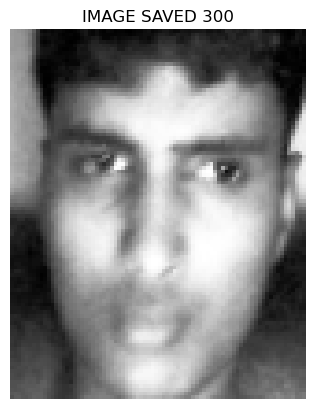

In [11]:
cam=cv2.VideoCapture(0)
name=input("Enter folder name :")
no_sample=int(input("Enter sample numbers :"))
folder="user_data1/"+name.lower()
if os.path.exists(folder):
    print("Folder with this name is already existed")
else:
    os.mkdir(folder)
    start_cap=False
    sample=1
    cv2.namedWindow(name,cv2.WINDOW_NORMAL)
    while True:
        rect,frame=cam.read()
        gray=gray_scale(frame)
        face_coord=detect_face(gray)
        if len(face_coord)>0:
            faces=pipeline(gray,face_coord)
            img_name=str(sample)+".jpg"
            cv2.imwrite(folder+"/"+img_name,faces[0])
            plot_fxn(faces[0],"IMAGE SAVED {}".format(sample))
            clear_output(wait=True)
            if start_cap==True:
                sample+=1
        else:
            print("NO FACE FOUND!!!")
        draw_rectangle(frame,face_coord)
        cv2.imshow(name,frame)
        key_press=cv2.waitKey(1)
        if key_press==ord("c"):
            if start_cap==False:
                start_cap=True
        if key_press==ord("q"):
            break
        if sample>no_sample:
            break
    cam.release()
    cv2.destroyAllWindows()

### let's create unknown person dataset

In [12]:
path="C:/Users/Anoop Arpan/Downloads/archive (10)/lfw-deepfunneled/lfw-deepfunneled"
c=1

In [13]:
for person_name in os.listdir(path)[:200]:
    for image in os.listdir(path+"/"+person_name)[:1]:
        img=cv2.imread(path+"/"+person_name+"/"+image,0)
        face_coord=detect_face(img)
        if len(face_coord)>0:
            imge=pipeline(img,face_coord)
            img_save="user_data1/unknown/"+str(c)+".jpg"
            cv2.imwrite(img_save,imge[0])
            print(img_save,"SAVED!!!")
        c+=1
  

user_data1/unknown/1.jpg SAVED!!!
user_data1/unknown/2.jpg SAVED!!!
user_data1/unknown/3.jpg SAVED!!!
user_data1/unknown/4.jpg SAVED!!!
user_data1/unknown/5.jpg SAVED!!!
user_data1/unknown/6.jpg SAVED!!!
user_data1/unknown/7.jpg SAVED!!!
user_data1/unknown/8.jpg SAVED!!!
user_data1/unknown/9.jpg SAVED!!!
user_data1/unknown/10.jpg SAVED!!!
user_data1/unknown/11.jpg SAVED!!!
user_data1/unknown/12.jpg SAVED!!!
user_data1/unknown/13.jpg SAVED!!!
user_data1/unknown/14.jpg SAVED!!!
user_data1/unknown/15.jpg SAVED!!!
user_data1/unknown/16.jpg SAVED!!!
user_data1/unknown/18.jpg SAVED!!!
user_data1/unknown/19.jpg SAVED!!!
user_data1/unknown/20.jpg SAVED!!!
user_data1/unknown/22.jpg SAVED!!!
user_data1/unknown/23.jpg SAVED!!!
user_data1/unknown/24.jpg SAVED!!!
user_data1/unknown/25.jpg SAVED!!!
user_data1/unknown/26.jpg SAVED!!!
user_data1/unknown/27.jpg SAVED!!!
user_data1/unknown/28.jpg SAVED!!!
user_data1/unknown/29.jpg SAVED!!!
user_data1/unknown/30.jpg SAVED!!!
user_data1/unknown/31.jpg SAV